## Generalized Linear Models 
- GLMs make assumptions of relationship between dependent and independent variables 
- Hypothesis orientation to model building, in validating linear relationship exists , and is tested after
  model training 
  
### 2. Linear Regression  
Theoretical aspects for Linear Regression, and algorithm are discussed here - 
http://localhost:8888/notebooks/Documents/DS/Supervised%20Learning/SL201/Linear%20Regression/Linear_Regression_latest.ipynb

#### Key Aspects :
1. Strong assumptions about data relationships 
  - Linearity
  - No specification bias 
  - Homoscedasticity : This is adjusted for in GLMs where target has other than normal distribution
  - Multicolinearity  
  - Normality of Errors 
  - Autocorrelation of Errors 
2. Loss Function - Mean Residual Sum of Squares/ Mean RSS  
3. Model Complexity
  - There is no mechanism to control model complexity(without regularization), something like k in kNN
  - Linear models can become complex, by increase in number of features, feature forms, interactions 
  - In presence of large number of features, a measure of complexity often is the size of coefficients, 
    which we will see later, is used to control complexity. 
4. Use of Linear regression in sci-kit learn 
5. Comparison with kNN regression

In [186]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib notebook
plt.style.use('bmh')

In [3]:

X, y = make_regression(n_samples= 100, n_features= 1, n_informative= 1, 
                n_targets= 1, bias = 50, noise = 30, random_state= 123)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 123)
print("Shapes of X_train = {0}, X_test = {1}, y_train = {2}, y_test = {3}"  
       .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

linear_model = LinearRegression(fit_intercept= True)
linear_model.fit(X_train, y_train)
print('weights = {0:}, intercept = {1}'.format(linear_model.coef_, linear_model.intercept_))
scored_train_linear = linear_model.predict(X_train)
scored_test_linear = linear_model.predict(X_test)
lm_rsq_train = linear_model.score(X_train,y_train)
lm_rsq_test = linear_model.score(X_test,y_test)

# knn model
k = 5
knn_model = KNeighborsRegressor(n_neighbors = k)
knn_model.fit(X_train, y_train)
scored_train_knn = knn_model.predict(X_train)
scored_test_knn = knn_model.predict(X_test)
knn_rsq_train = knn_model.score(X_train, y_train)
knn_rsq_test = knn_model.score(X_test, y_test)

Shapes of X_train = (80, 1), X_test = (20, 1), y_train = (80,), y_test = (20,)
weights = [ 33.930188], intercept = 49.61446610803708


<IPython.core.display.Javascript object>


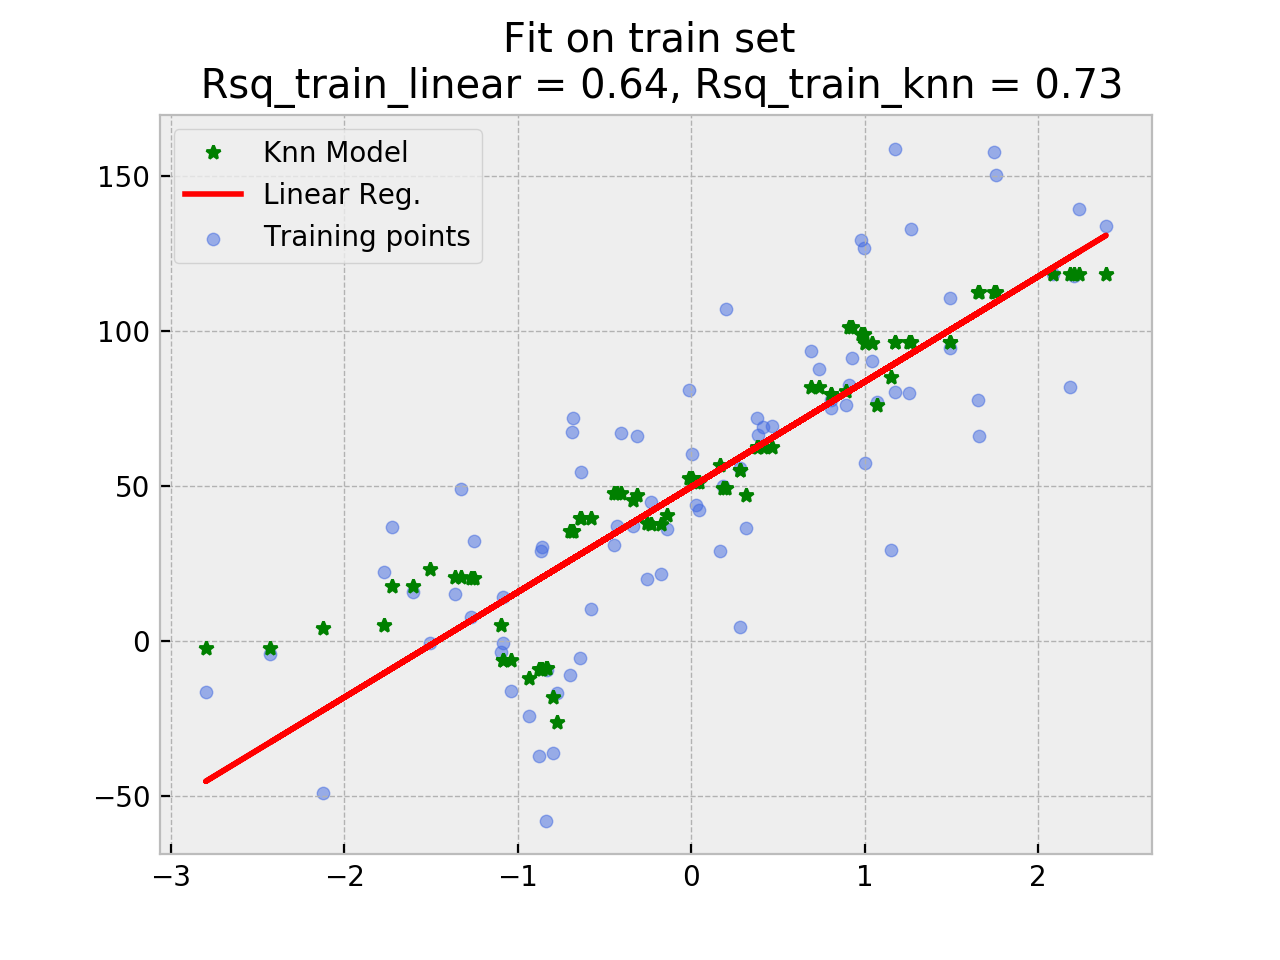

In [4]:
plt.figure()
plt.scatter(X_train, y_train,c = 'royalblue', marker = 'o', alpha = 0.5, s = 20, label = 'Training points')
plt.plot(X_train,scored_train_knn, 'g*', label = 'Knn Model',markersize = 5)
plt.plot(X_train, scored_train_linear,'r-', label = 'Linear Reg.')
plt.title('Fit on train set \n Rsq_train_linear = {0:.2f}, Rsq_train_knn = {1:.2f}'
          .format(lm_rsq_train,knn_rsq_train))
plt.legend()

<IPython.core.display.Javascript object>


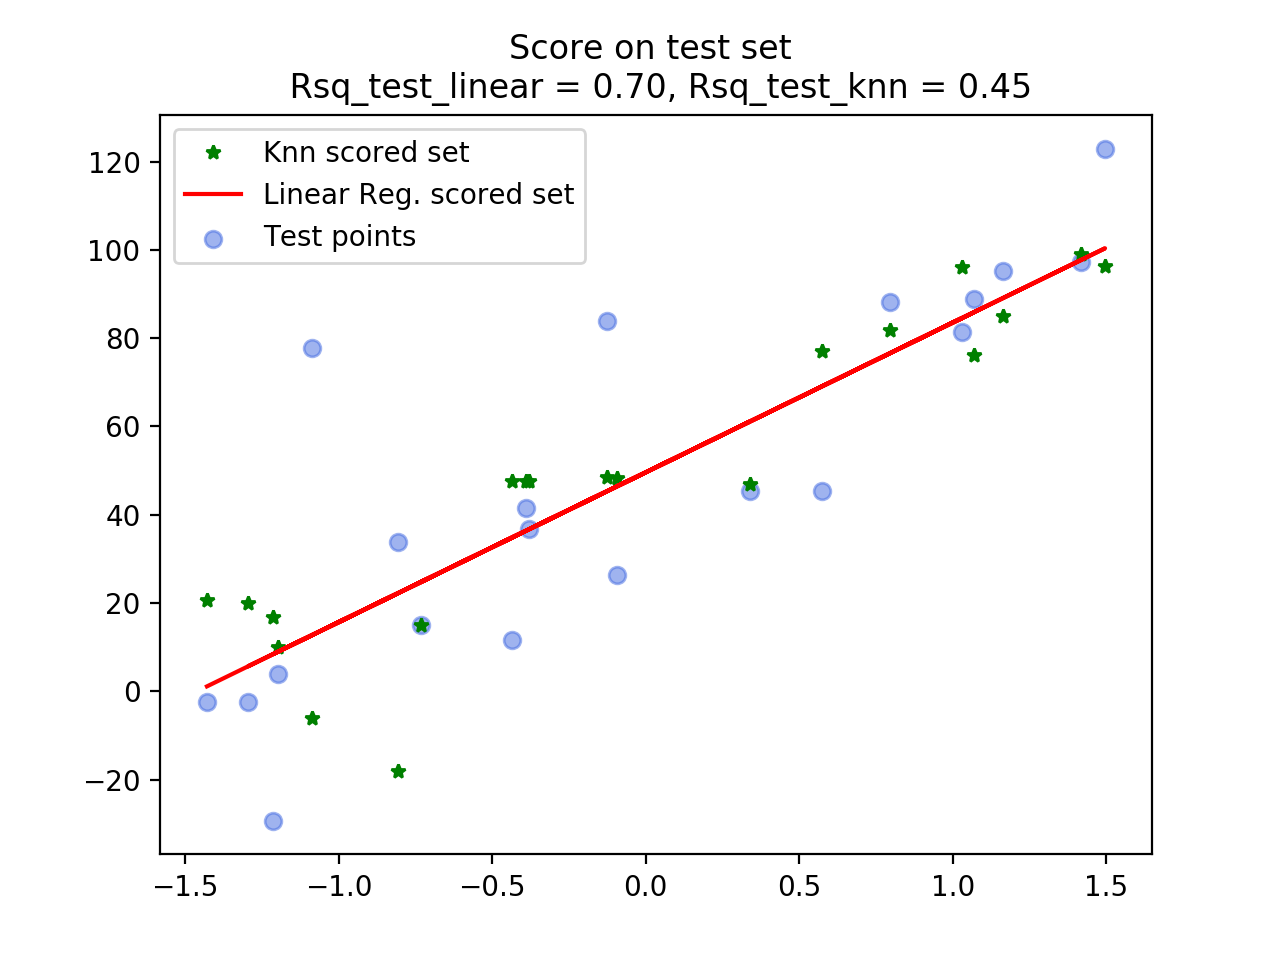

In [22]:
plt.figure()
plt.scatter(X_test, y_test,c = 'royalblue', marker = 'o', alpha = 0.5, label = 'Test points')
plt.plot(X_test,scored_test_knn, 'g*', markersize = 5,label = 'Knn scored set')
plt.plot(X_test, scored_test_linear,'r-',label = 'Linear Reg. scored set')
plt.title('Score on test set \n Rsq_test_linear = {0:.2f}, Rsq_test_knn = {1:.2f}'
          .format(lm_rsq_test,knn_rsq_test))
plt.legend()

##### Comparison of Linear Regression and kNN regression

|kNN|Linear Regression
|:-|:-|
|1.Simple to understand, no assumptions are made on distribution of data|1. Strong assumptions on relationships in data, assumptions require validation|
|2.Can learn non-linear decision boundaries|2. Requires variables to be transformed to address non-linear relationships|
|3. Can be sensitive to changes in data,  generally have low bias (can learn non-linear relationships)|3. Stable to changes in data, but generally have high bias (cause of linear structure)|

### 3.  Ridge Regression
- 3.1 Cost Function : L2 penalty in cost function, scoring remains same
- 3.2 Need for feature scaling
  - type of scaling depends on data, learning task (class/reg) and algorithm (more later)
- 3.3 Effect of regularization on 
    - Size of coefficients 
    - Interpretability of regression
- 3.4 Finding standard error of Betas in regularized regression 
- 3.5 Show how regularization performs better than unregularized regression  
- 3.6 How the optimization problem is solved in sci-kit learn through different solvers 
  - When to use which solver

#### 3.1 Ridge Regression. 
Cost function = f($\beta$) = 
$\Sigma_{i=1}^m[y^{(i)} - (\widehat{\beta_0} + \widehat{\beta_1}*x^{(i)}_1 + ... + \widehat{\beta_n}*x^{(i)}_n)]^2 + 
\alpha * \Sigma_{j=1}^n\beta^2_j$ 

- **bias term is not used in regularization term**

- **Alpha** 
  - Alpha controls the extent of regularization, is > 0 
  - It becomes a hyperparameter, that choice of alpha affects the parameters of the model , and hence 
    it is tuned using a validation dataset / cross validation 
  - Higher alpha means more regularization  

#### How does penalty term avoid overfitting? 
  - Empirical observation suggested, that important variables in linear regression get large coefficients which cause
    overfitting.
    First half of the cost function tries to learn that way by decreasing RSS, but second half penalizes 
    increase in coefficient size. 
  - This counter-effect  means that coefficient size of important variables is limited, and so model is able 
    to generalize well on newer data sets
#### Once the coefficients and intercept is learned, predictions are generated using them as in case of unregularized regression  

#### 3.2 Feature Scaling 
- The features in the regression can be on different scales. **Remember the learned coefficients values depend
  on the scale of features used** 
- when using ridge, we are adding all squared weights together by giving them same weight 1, it turns out well
  if we scale each feature to a common scale 
- **Feature scaling is helpful in many aspects and used in many algorithms as pre-procssing step**
  - Esp. parametric models : Linear, Logistic regression, neural nets, svm
  - Faster convergence of learning algorithm 
  - Fair and easy specification of weights without any weighting
- Many options available for type of scaling, MinMax, z etc.   
- **Use same scaler on test set, do not fit the scaler again with test data, results in data leakage!, think of
  it as you are not supposed to know about test data during training, but you will end up using extreme values
  of test data set in scaling, this might result in getting very good results on test set. Doing this in kaggle might
  be desirable to exploit the leakage :D**  
- Downside - interpretation is affected, meaning the regression prediction would be different with feature scaling
  than without it

In [6]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)
X_crime, y_crime = load_crime_dataset()
print(X_crime.shape, y_crime.shape)

(1994, 88) (1994,)


#### Effect of feature scaling using two features - MinMaxScaler 
x = (x - min(x))/ range(x)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sample = X_crime.loc[:,['agePct12t21', 'agePct12t29']]
scaler = MinMaxScaler() 
scaler.fit(sample) # Compute the minimum and maximum to be used for later scaling
print(scaler)
sample_tfd = scaler.transform(sample) # transformation

MinMaxScaler(copy=True, feature_range=(0, 1))


<IPython.core.display.Javascript object>


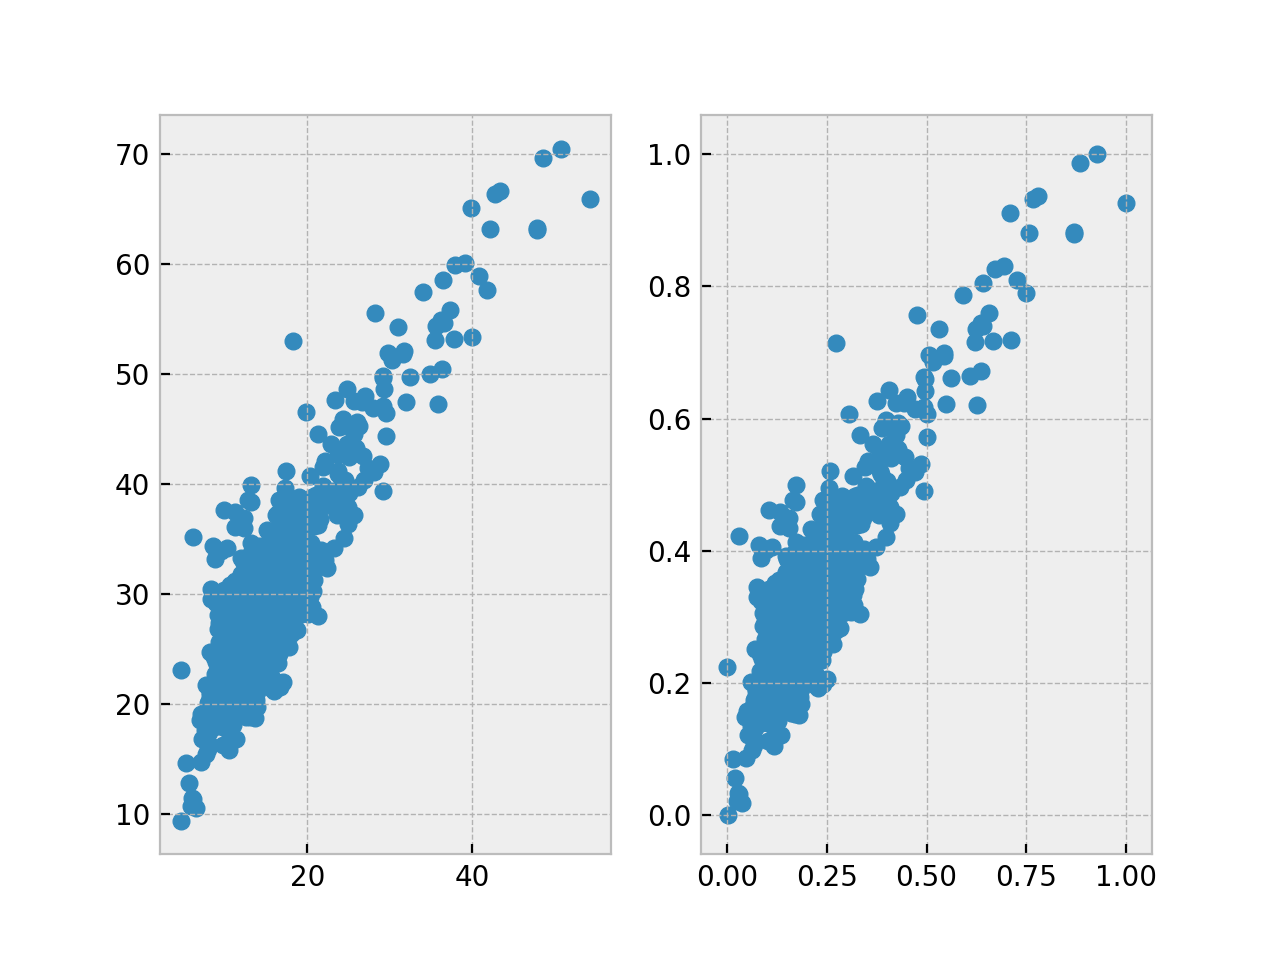

In [8]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(X_crime['agePct12t21'], X_crime['agePct12t29'])
plt.subplot(1,2,2)
plt.scatter(sample_tfd[:,0], sample_tfd[:,1])

#### 3.3 Ridge Regression (with normalization) , effect on coefficient size and interpretability

- How do coefficients change with alpha (extent of regularization). 
  - Increase in regularization, decreases the coefficient size generally
  - Helpful : https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html
- How do coefficient compare with unregularized regression
  - Ridge coefficients are smaller ( see bar chart)
- See the difference in predictions, how is interpretability affected 
  - Scatter on test set shows prediction differ, there is no pattern of consistently being high or low though
  - Interpretability is affectd, cause you cannot make reasoning that a coefficient represent the effect of unit   
    change in the variable, keeping all others same. However, you can compare coefficient sizes to gauge importance.
    Interpretability is affected because we use an altered cost function.

In [11]:
# Linear model, not regularized
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size = 0.2,random_state = 123)
print("Shapes of X_train = {0}, X_test = {1}, y_train = {2}, y_test = {3}"  
       .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

scaler = MinMaxScaler()
X_train_tfd = scaler.fit_transform(X_train)
X_test_tfd = scaler.transform(X_test)

linear_model = LinearRegression(fit_intercept= True)
linear_model.fit(X_train_tfd, y_train)
#print('weights = {0}, intercept = {1}'.format(linear_model.coef_, linear_model.intercept_))
print('Non zero weights = {}'.format(sum(linear_model.coef_ != 0)))
#print('Training Time in ms: {}'.format((end-start)*1000))
#scored_train_linear = linear_model.predict(X_train)
scored_test_linear = linear_model.predict(X_test_tfd)
lm_rsq_train = linear_model.score(X_train_tfd,y_train)
lm_rsq_test = linear_model.score(X_test_tfd,y_test)
print('Linear model: Rsq_train = {0:.3f}, Rsq_test = {1:.3f}'
      .format(lm_rsq_train,lm_rsq_test))

Shapes of X_train = (1595, 88), X_test = (399, 88), y_train = (1595,), y_test = (399,)
Non zero weights = 88
Linear model: Rsq_train = 0.680, Rsq_test = 0.588


In [12]:
# Regularized
from sklearn.linear_model import Ridge
alpha_grid =  [10**(-1*i) for i in range(5)]
alpha_grid += [1.5,2,2.5,3,3.5,4,4.5,5]
alpha_grid = sorted(alpha_grid)

train_error = []
test_error = []
for alpha in alpha_grid:
    linear_model_ridge = Ridge(random_state = 123, alpha = alpha)
    #print(linear_model_ridge)
    linear_model_ridge.fit(X_train_tfd, y_train)
    print('Non zero weights = {}'.format(sum(linear_model_ridge.coef_ != 0)))
    print('Training Iterations = {}'.format(linear_model_ridge.n_iter_))
    ridge_rsq_train = linear_model_ridge.score(X_train_tfd,y_train)
    ridge_rsq_test = linear_model_ridge.score(X_test_tfd,y_test)
    train_error.append(ridge_rsq_train)
    test_error.append(ridge_rsq_test)


Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None


<IPython.core.display.Javascript object>


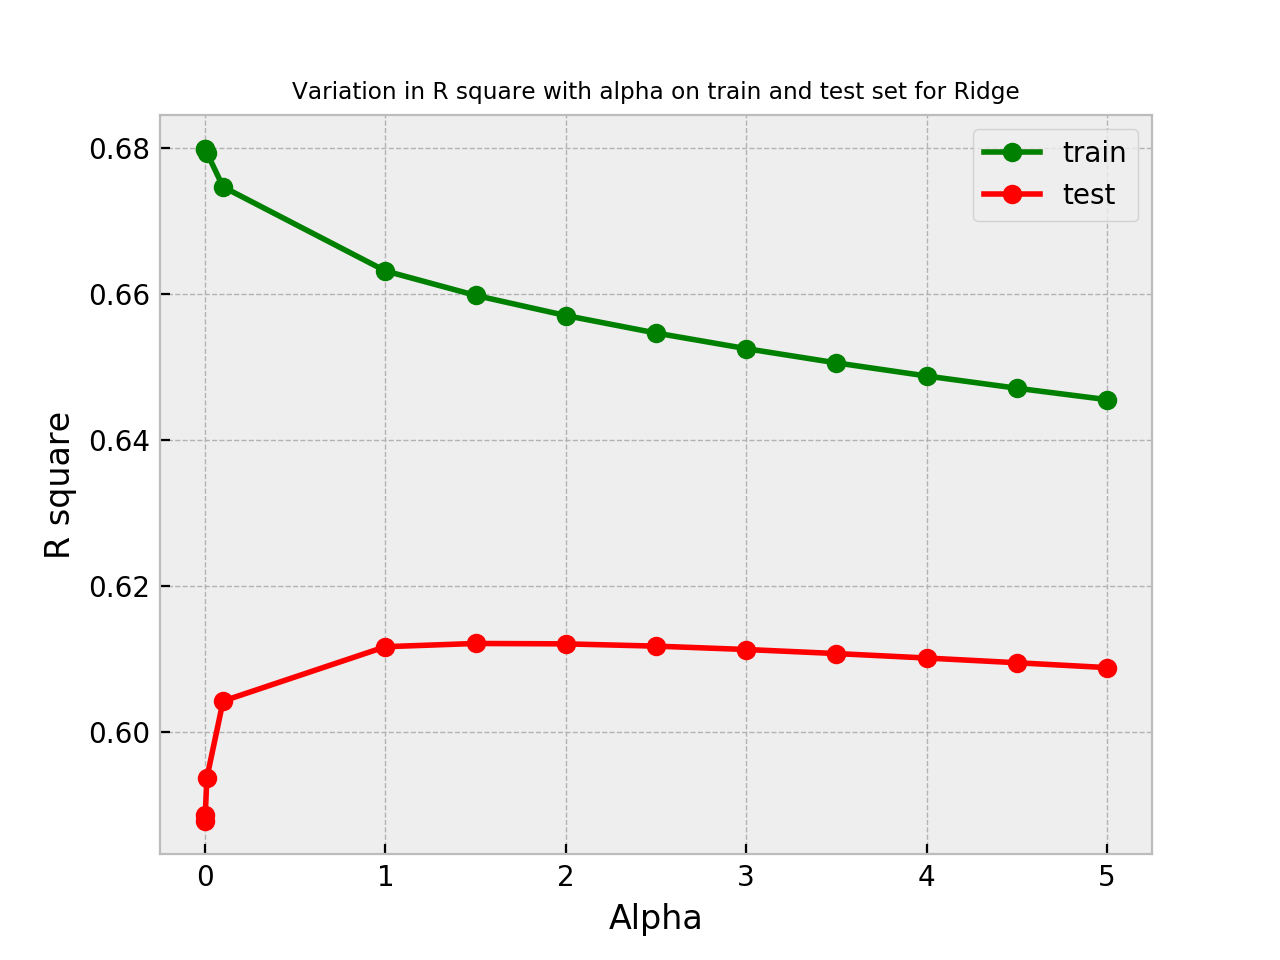

Text(0.5,1,'Variation in R square with alpha on train and test set for Ridge')

In [19]:
plt.figure() 
plt.plot(alpha_grid, train_error,'go-', label = 'train')
plt.plot(alpha_grid, test_error,'ro-', label = 'test')
plt.xlabel('Alpha')
plt.ylabel('R square')
plt.legend()
plt.title('Variation in R square with alpha on train and test set for Ridge', size = 'small')

In [22]:
best_ridge = Ridge(random_state = 123, alpha = 1.5)
best_ridge.fit(X_train_tfd, y_train)
ridge_best_train = best_ridge.score(X_train_tfd,y_train)
ridge_best_test = best_ridge.score(X_test_tfd,y_test)
scored_test_ridge = best_ridge.predict(X_test_tfd)
print('Best ridge model -- Train R Sq = {0:,.3f}, Test R Sq = {1:,.3f}'
      .format(ridge_best_train,ridge_best_test))

Best ridge model -- Train R Sq = 0.660, Test R Sq = 0.612


<IPython.core.display.Javascript object>


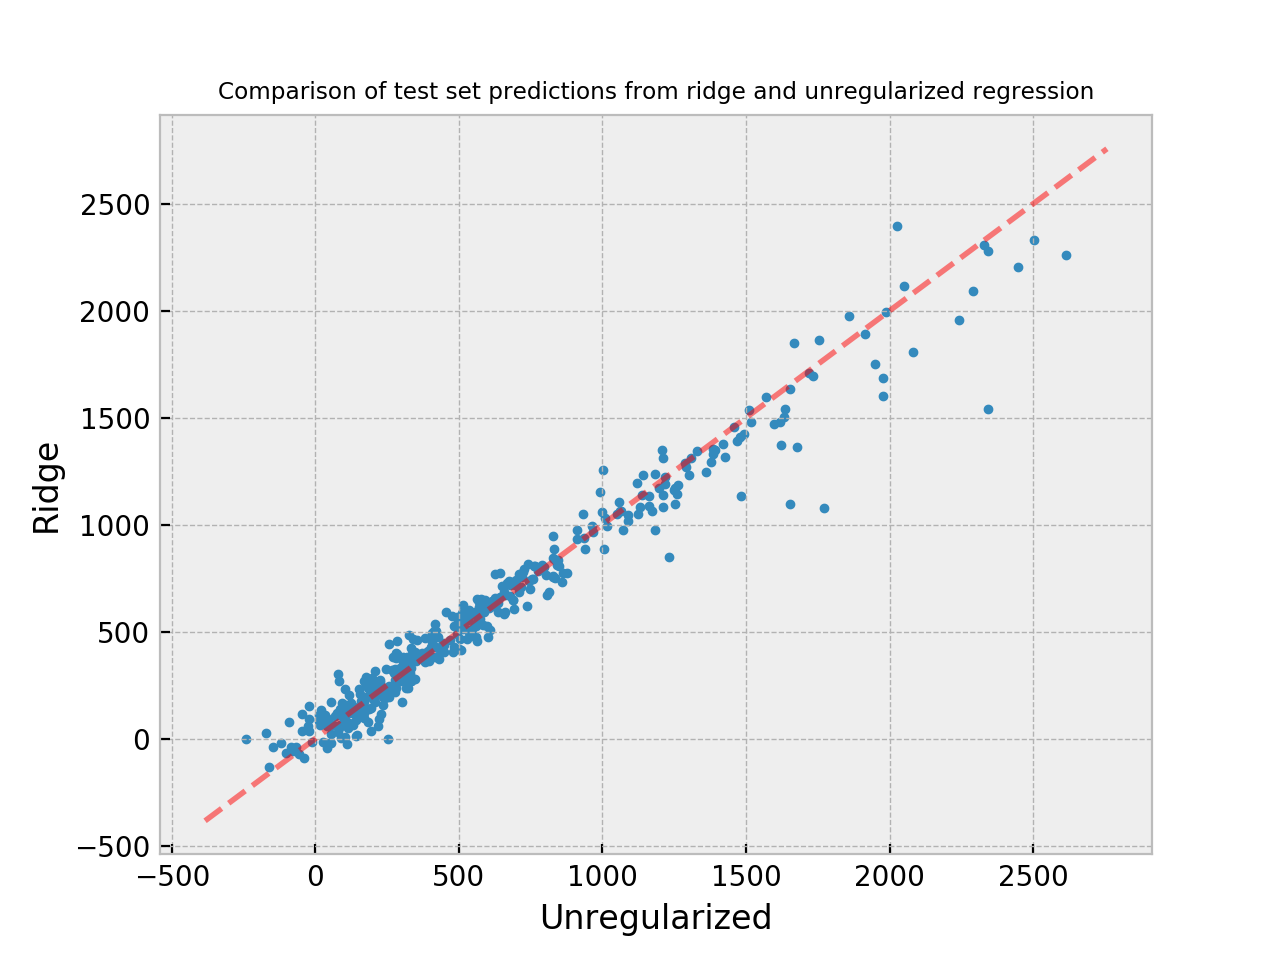

Text(0.5,1,'Comparison of test set predictions from ridge and unregularized regression')

In [26]:
plt.figure()
plt.scatter(scored_test_linear, scored_test_ridge, marker = '.')
plt.xlabel('Unregularized')
plt.ylabel("Ridge")
ax = plt.gca()
mn, mx = ax.get_xlim()
arr = range(int(mn),int(mx),1)
plt.plot(arr,arr,'r--', alpha = 0.5)
plt.title('Comparison of test set predictions from ridge and unregularized regression',
         size = 'small')

### Notice coefficient size in ridge is reduced (not for all variables, for some it increases) but for all where unregularized regression seems to have a large coef. size

<IPython.core.display.Javascript object>


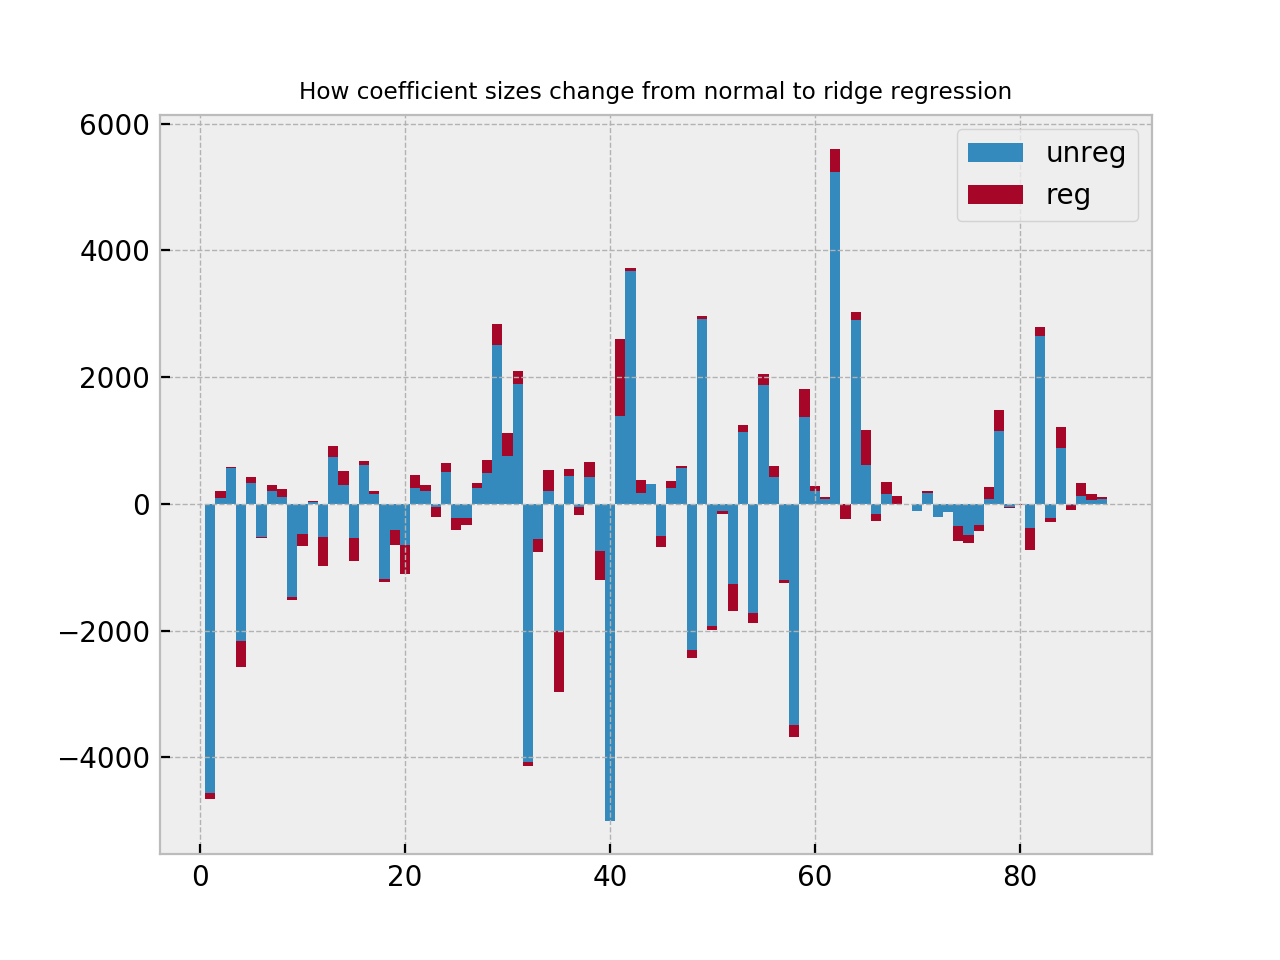

Text(0.5,1,'How coefficient sizes change from normal to ridge regression')

In [28]:
plt.figure()
#len(linear_model_ridge.coef_)
x = list(range(1,89,1))
#x_ = [i+0.5 for i in x]
plt.bar(x = x,height = linear_model.coef_, width = 1, label = 'unreg')
plt.bar(x = x ,height = best_ridge.coef_, width = 1, label = 'reg',bottom = linear_model.coef_)
plt.legend()
plt.title('How coefficient sizes change from normal to ridge regression', size = 'small')

####  Regularization is especially useful when m(training samples) < n(features). As the data set size increases effect of regularization in making model generalize well decreases

#### 3.4 Standard error of Betas in Regularized regressions
- Finding standard errors in regression coefficients from ridge/lasso
  - https://stats.stackexchange.com/questions/45449/when-using-glmnet-how-to-report-p-value-significance-to-claim-significance-of-pr
- Finding standard errors from regression 
  - sklearn.Linear Regression() does not give, but class can be easily extended/ or use statsmodels. 
  The solution comes from solving the matrix algebra 
  - The diagonal of np.dot(X,X^T). gives the variance of betas
  - https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression  

#### 3.5 Ridge Regression (with normalization and without)
- Should not even consider this, because the weighting the betas as same (1) would not be right in the L2
  term

#### 3.6 How the optimization problem is solved in sci-kit learn through different solvers
- Can use 5 potential solvers, setting is auto to choose
- Setting for number of iterations and tol depend on solvers as below (conjugate gradient)
    - Solver to use in the computational routines:
      - ‘auto’ chooses the solver automatically based on the type of data.
      - ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.
      - ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
      - ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).
      - ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.
      - ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
      - All last five solvers support both dense and sparse data. However, only ‘sag’ and ‘saga’ supports sparse input when fit_intercept is True.

#### 4. Lasso Regression  
4.1 Cost Function, how optimization problem is solved  
4.2 L1 based variable selection  
4.3 Tuning Alpha  
4.4 Lasso vs Ridge - When to use which  

#### 4.1 Cost Function
Cost function = f($\beta$) = 
$ \frac{1}{2m}\Sigma_{i=1}^m[y^{(i)} - (\widehat{\beta_0} + \widehat{\beta_1}*x^{(i)}_1 + ... + \widehat{\beta_n}*x^{(i)}_n)]^2 + 
\alpha * \Sigma_{j=1}^n|\beta_j|$  
- Intercept terms is not kept as part of L2 term
- Cost function is not differentiable at w = 0, as |w| is not differentiable at 0. 
- Coordinate descent algorithm is used to solve the optimization problem. 
  -  Compared to gradient descent it is slower and takes time to converge. 
  - 'tol' parameter aids to get to a stopping point, if the max update amongst weights is less than the tolerance. 
  - Since convergence is slow, it may be a good idea to keep max_iter to a high a number than default 1000  
  - Coordinate descent results in elimination of variables, and hence their weights become 0.

#### 4.2 L1 based feature selection
- Uses an L1 penalty term 
- **L1 penalty term has an effect that it reduces the coefficients of weak variables to 0 (coordinate descent), unlike ridge, hence serving as a model based variable selection technique**   
- **IN FACT L1 regularized algorithms are used for feature selection - Lasso for regression, and Logistic Regression and LinearSVC for classification**   
- In case of multiple high colinear variables, lasso tends to choose one of the variables randomly, making all
  others zero.
-  Scikitlearn provides a feature selection class 'SelectFromModel in sklearn.feature_selection to do selection based
  on a model,other linear models that could be used are Logistic Regression or SVM 
  - Reference : https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection
  - How to use Lasso for feature selection is shown below   

#### 4.3 Using Lasso Regression for feature selection and tuning alpha  
- alpha being hyperparameter will influence features in the solution of lasso. 
- get a correlation matrix between features to know extent of colinarity to select a strategy, evaluate
  dimensions of data as well. 
- Three strategies for tuning alpha, two based on Cross validation based model/alpha selection, one based on information theory apporach of model selection
  - Cross validation, and eval metric based
    - LassoCV : Lasso loss function, coordinate descent. Good for high dimensional data, with high colinearity, follows a fixed regularization path (alphas) to explore through CV
    - LassoLarsCV  : Lasso loss function, using Lars algorithm, usefulnes is in 
      - explores more values of alpha than Lasso CV, and hence is stable
      - speed, when features are more than samples. 
      - But, is fragile in case high multicolinearity data sets
  - LassoLarsIC
    - Information criterion based alpha selection 
    - Information theory says : balance predictive performance with model complexity, complexity measured by 
      number of features. Measures are : AIC, BIC 
      - $\log{AIC} = 2\frac{k}{n} + \log\frac{RSS}{n} $  
      - $\log{BIC} = \frac{k}{n}* \log{n} + \log\frac{RSS}{n} $
      - Benefits : speed, do not have to explore the path k times, good for huge data sets 
  - Possibly a good idea to try all three available in sklearn, unless you can categorize the situation to suit one

In [78]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [35]:
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True, random_state = 22)

#### Nested CV to etimate performance of the method

In [44]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 10, shuffle = True, random_state= 12)
splits = kf.split(X_train)

In [45]:
inner_cv_test_scores = []
from sklearn.linear_model import LassoCV
for train_idx, test_idx in splits:
    X_train_cv, y_train_cv = X_train[train_idx] , y_train[train_idx]
    X_test_cv, y_test_cv = X_train[test_idx], y_train[test_idx]
    kf_inner = KFold(n_splits= 5, shuffle = True, random_state= 12)
    lasso_cv = LassoCV(max_iter= 5000, cv = kf_inner)
    lasso_cv.fit(X_train_cv, y_train_cv)
    score = lasso_cv.score(X_test_cv, y_test_cv)
    inner_cv_test_scores.append(score)
    print('Best alpha :', lasso_cv.alpha_)

Best alpha : 0.00476594334758
Best alpha : 0.0649151223579
Best alpha : 0.0287760773494
Best alpha : 0.00519949226748
Best alpha : 0.00836594805772
Best alpha : 0.0244167513722
Best alpha : 0.0510322485184
Best alpha : 0.0692322742072
Best alpha : 0.0839303334768
Best alpha : 0.00250073080558


In [51]:
print(inner_cv_test_scores)
mean_mse = np.mean(inner_cv_test_scores)
std_mse = np.std(inner_cv_test_scores)
print('Estimated performance through mse for the method :',mean_mse, '+-',std_mse/np.sqrt(len(inner_cv_test_scores)))

[0.3430033375540501, 0.46858101603028413, 0.25895170349804852, 0.57974803894411875, 0.45397219579470577, 0.63035782437616916, 0.38967896900349897, 0.5100253185599023, 0.44715711656460727, 0.5850067829736223]
Estimated performance through mse for the method : 0.46664823033 +- 0.0346954192428


#### Selecton of alpha and feature selection can both be done through LassoCV
- Select alpha that reduces the mean eval metric in cv
- For the alphas used in cv, generate the transition of features to zero, as alpha varies,
  check manually to see if alpha from predictive performance also yields stable features (that drop to 0
  gradually)

In [69]:
kf = KFold(n_splits= 10, shuffle = True, random_state= 12)
lasso_cv = LassoCV(max_iter= 5000, cv = kf_inner)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True,
    cv=KFold(n_splits=5, random_state=12, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=5000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

##### Visualizing test mse across folds with alpha

<IPython.core.display.Javascript object>


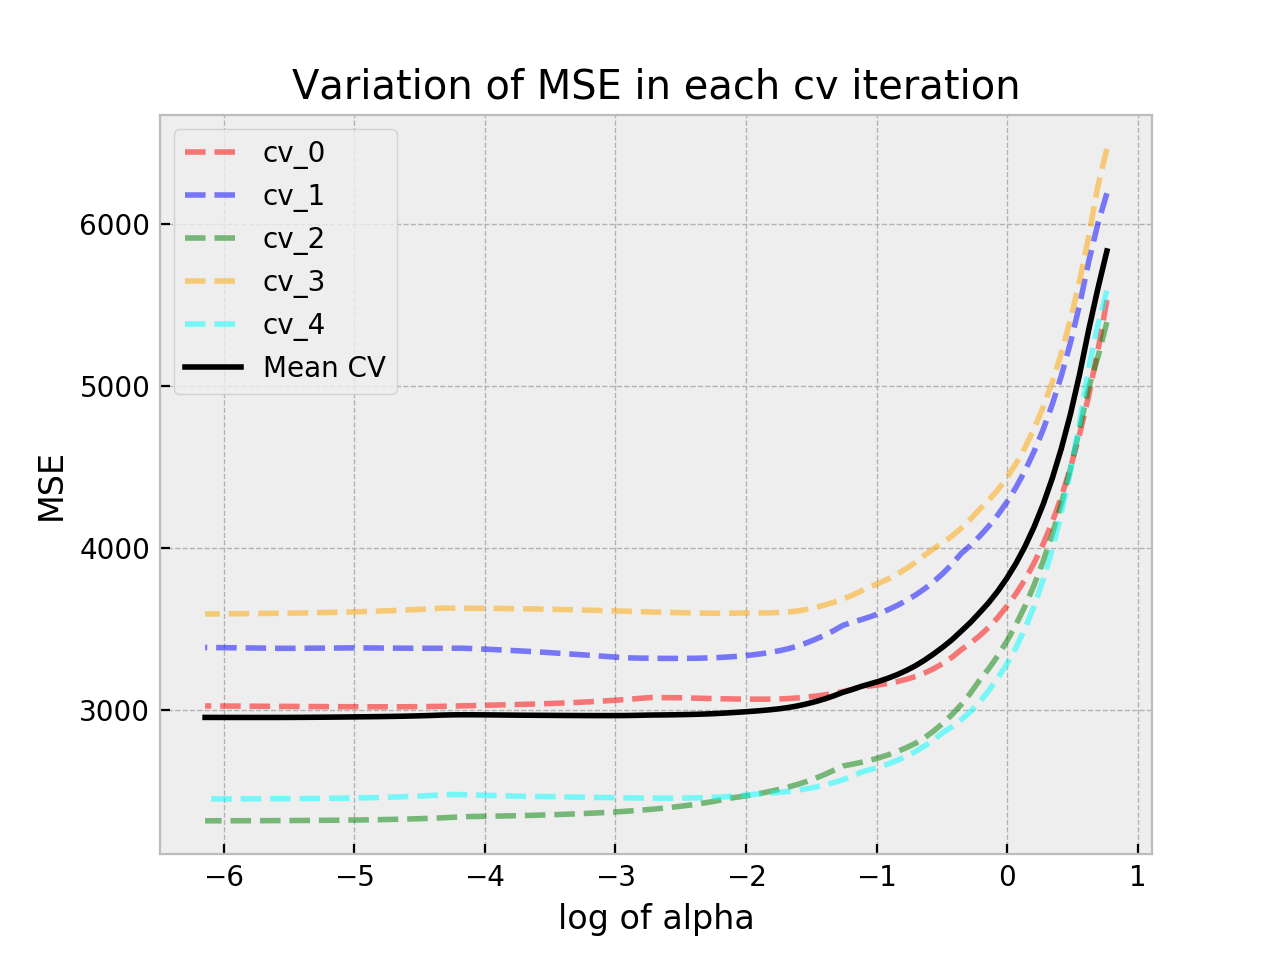

Text(0.5,1,'Variation of MSE in each cv iteration')

In [76]:
%matplotlib notebook
mse_path = lasso_cv.mse_path_
alphas = lasso_cv.alphas_
colors = ['red', 'blue', 'green', 'orange', 'cyan']
plt.figure()
for fold,c in zip(range(5), colors):
    plt.plot(np.log(alphas), mse_path[:,fold], c = c, linestyle = '--', label = 'cv_'+ str(fold), alpha = 0.5)
plt.plot(np.log(alphas), np.mean(mse_path,axis = 1) ,linestyle = '-', label = 'Mean CV', c = 'black')
plt.legend()    
plt.xlabel('log of alpha')
plt.ylabel('MSE')
plt.title('Variation of MSE in each cv iteration')

##### Visualizing feature sparsity through variation in feature size with alpha

In [87]:
coefs = []
for alpha in alphas:
    m = Lasso(alpha = alpha, max_iter = 5000, random_state= 12)
    m.fit(X_train, y_train)
    coefs.append(m.coef_)
coefs = np.array(coefs)    

<IPython.core.display.Javascript object>


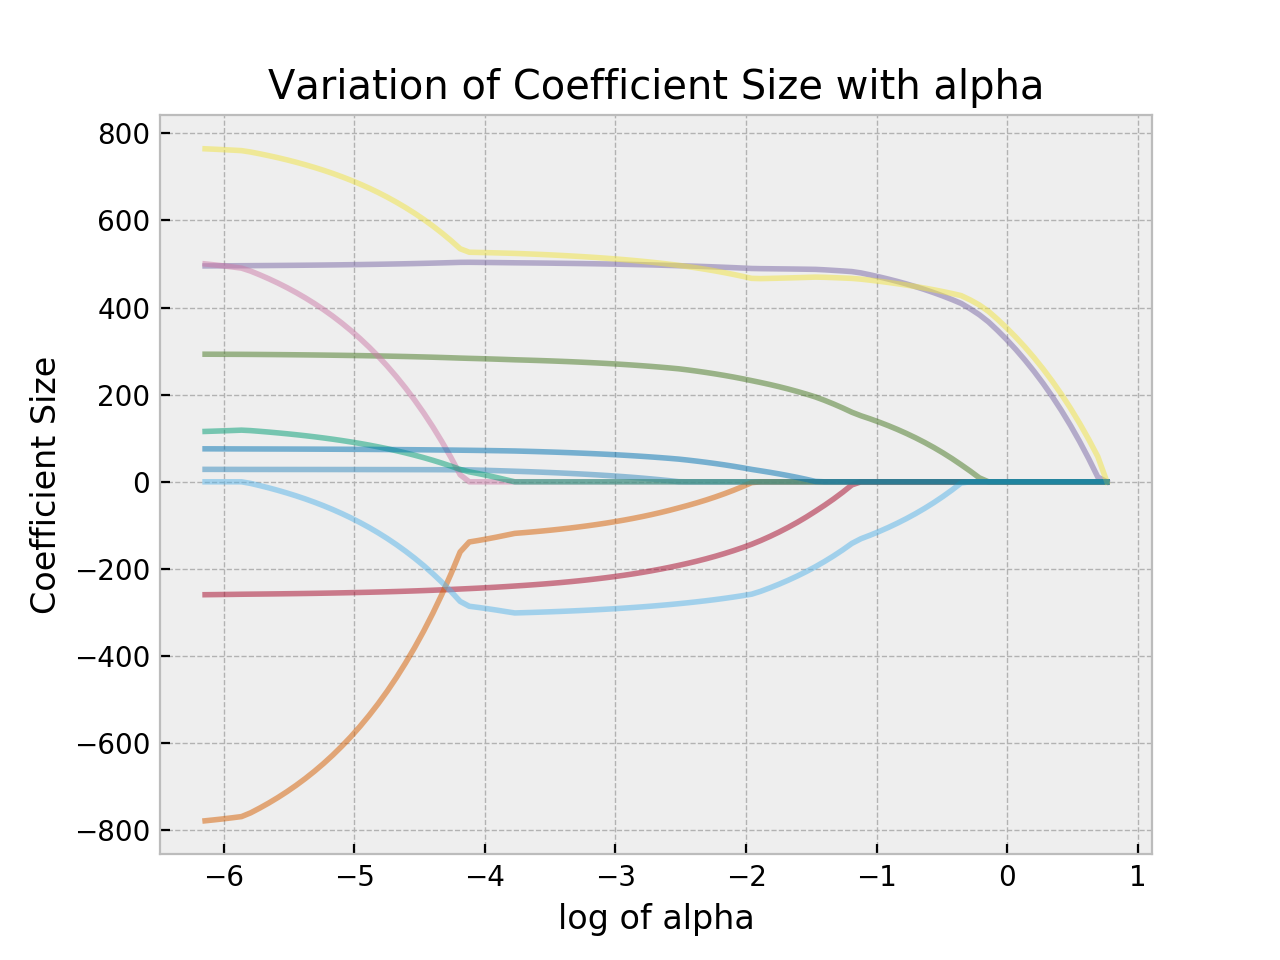

Text(0.5,1,'Variation of Coefficient Size with alpha')

In [98]:
plt.figure()
for n in range(coefs.shape[1]):
    plt.plot(np.log(alphas), coefs[:,n], linestyle = '-',alpha = 0.5)
plt.xlabel('log of alpha')
plt.ylabel('Coefficient Size')
plt.title('Variation of Coefficient Size with alpha')    

#### 4.4 Lasso vs Ridge 
- use ridge when several variables can contribute small-medium effects, however if there are several variables, 
  it might not be practical to have many of them in the model
- can use lasso when only some variables can conribute medium - large effects, often preferable in case of high dimensionality 
- In case of colinear variables, ridge will keep all of them , they all carry different weights, lasso tends to do random selection of one, based on alpha  
- Lasso needs more training iterations for convergence (coordinate descent)  
- In case of high dimensionality, and colinearity, elastic net can combine sparse properties of lasso and stability 
 of ridge

#### 5. Elastic Net
- Balances L1 and L2 penalty through a parameter $\rho$, gives a sparse solution but incoporates stability properties of L2 
- Elastic net is useful over Lasso in case of high dimensionality data with highly colinear variables  
- Lasso is likley to pick one at random,elastic net is likely to keep them all

#### 5.1 Cost function  
Cost function = f($\beta$) = 
$ \frac{1}{2m}\Sigma_{i=1}^m[y^{(i)} - (\widehat{\beta_0} + \widehat{\beta_1}*x^{(i)}_1 + ... + \widehat{\beta_n}*x^{(i)}_n)]^2 + 
\alpha * \rho * \Sigma_{j=1}^n|\beta_j| + \frac{\alpha}{2} * (1-\rho) * \Sigma_{j=1}^n\beta_j^2$  

#### 5.2 Solver , key parameters, search for alpha and rho
- Coordinate descent used 
- $\rho$ controls the extent of L1 and L2 penalty, and is between 0 to 1. 0 leads to ridge, 1 leads to lasso
- **A good choice while tuning is to put $\rho$ values more closer to 1 than 0**  
- Class ElasticNetCV can be used to gridsearch over alpha and rho values.
- Alphas values are pre-created using 
  params
    - eps is ratio of alpha_min/alpha_max. 
    - n_alphas is default 100 
  - Other params like in Lasso  
    - normalize, does standard scaling if intercept is True. 
    - max_iter, tol, selection control length of iterations for convergence

#### 5.3 Regularization path differences between Lasso and Elastic net on a data set
- How size of coefficients varies
- Reference : https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py 
- Tuning for l1_rario and alpha. 

In [211]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True, random_state = 22)
kf = KFold(n_splits= 10, shuffle = True, random_state= 12)
enet = ElasticNetCV(l1_ratio = list(np.arange(0.6,1.05,0.05)),
max_iter = 5000, cv = kf)
enet.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True,
       cv=KFold(n_splits=10, random_state=12, shuffle=True), eps=0.001,
       fit_intercept=True,
       l1_ratio=[0.59999999999999998, 0.65000000000000002, 0.70000000000000007, 0.75000000000000011, 0.80000000000000016, 0.8500000000000002, 0.90000000000000024, 0.95000000000000029, 1.0000000000000004],
       max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

##### Different alphas are generated for each l1_ratio. 
So, to test best l1_ratio first
- plot variation of score with alphas for each l1_ratio (**note the graph below shows there are different alpha
  values for an l1_ratio, esp. noticeable at the edges**). 
- Below it is evident, l1_ratio 1 has lowest mean score across all alphas considered 

In [222]:
print(enet.alphas_.shape)
print(enet.coef_.shape)
print(enet.mse_path_.shape)

(9, 100)
(10,)
(9, 100, 10)


<IPython.core.display.Javascript object>


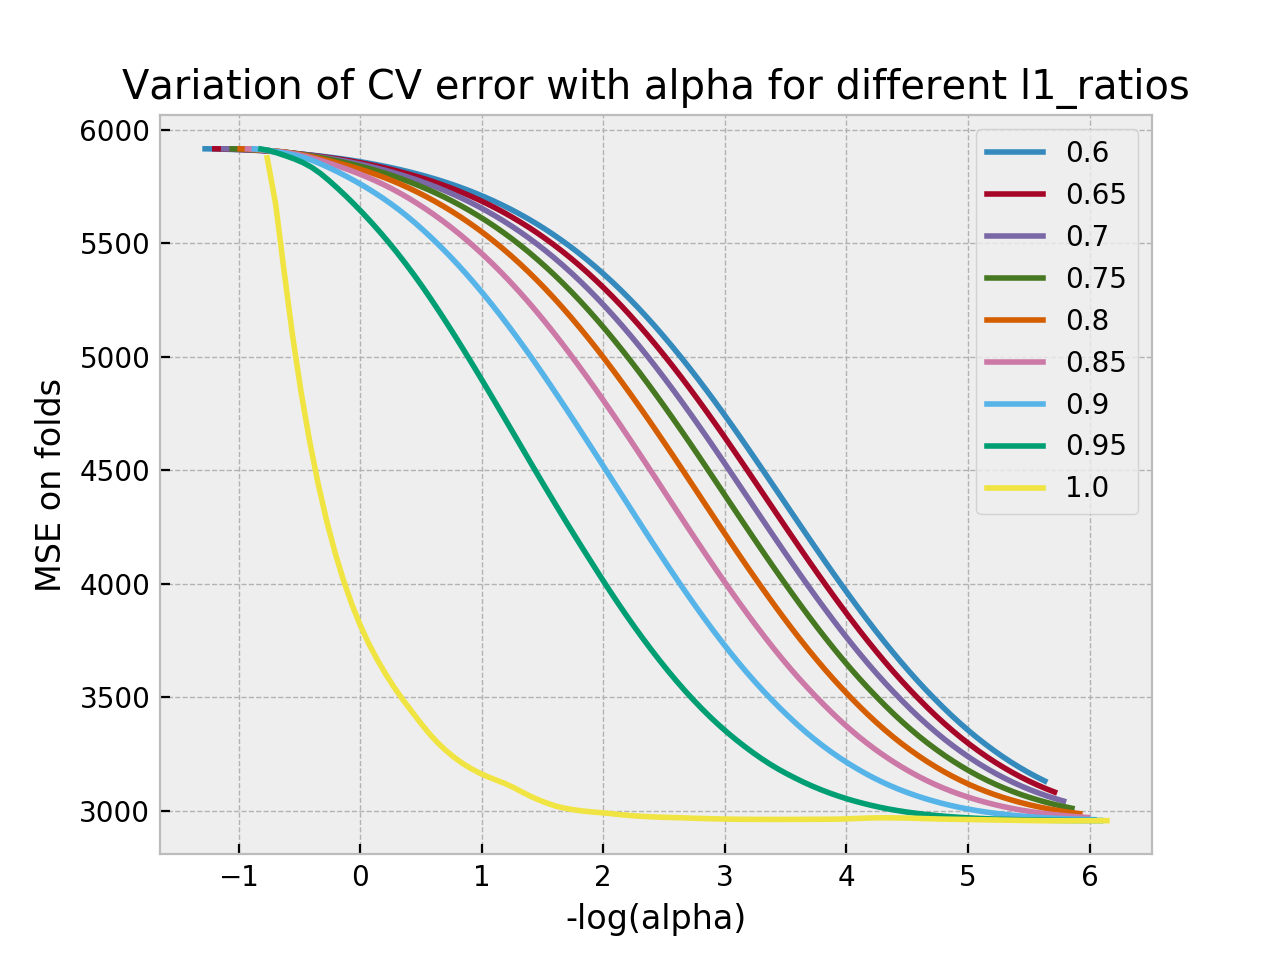

In [223]:
for i,rho in enumerate(enet.l1_ratio):
    #print(i)
    rho_alphas = enet.alphas_[i]
    alpha_scores = np.mean(enet.mse_path_[i], axis = 1)
    #plt.subplot(3,3,i+1)
    plt.plot(-np.log(rho_alphas), alpha_scores, label = str(rho))
    plt.xlabel('-log(alpha)')
    plt.ylabel('MSE on folds')
    plt.title('Variation of CV error with alpha for different l1_ratios')
    plt.legend()

##### Subsequently best alphas can be evaluated
- ElasticNetCV seems to do this proceudre internally

In [224]:
print(enet.l1_ratio_)
print(enet.alpha_)

1.0
0.00284006386657


#### 6. Polynomial features/ Regression  
**Polynomial features** 
-  Taking the available features and constructing polynomial features from them is creating multiplicative combination of a chosen degree from them.Eg : Features x1 and x2, for degree 2 features can give $x_1^2, x_2^2, x_1x_2$  
**Why Polynomial features** 
- Exploratory analysis can suggest relationship between predictor and predictand is non-linear, like squared or 
  you can hypothesize a multiplicative relationship as appropriate to predict the predictand, and not an additive one.
  **This is often called feature interaction, like $x_1x_2$**.   
  - $Salary = \beta_0 + \beta_1*Age + \beta_2 * Gender$ implies average salary of Either male or female is more than the other irrespective of the age. This may not be tru from the data, you'll be able to check it, which then means you
  should introduce an interaction feature. 
  So, $Salary = \beta_0 + \beta_1*Age + \beta_2 * Gender + \beta_3 * Gender * Age$  would be appropriate 
  - Polynomial features still allow you to fit a linear regression, as it is linear in terms of Beta's, but 
  allow you to capture non-linear relationship between predictor and predictand, weighted linearly by parameters.   
  - **Polynomial features allow to build more complex features, which can especially come handy in classification tasks,kernelized support vectors are an example of this.** 
  - **Other non-linear transformations are techincally called non-linear basis functions.**  
**Risks of using polynomial features** 
- Can overfit, and always used with regularization 

In [227]:
# Polynomial features calss allows constructing features by specifying degree, all feattures of degree <=2
# are constructed, you can specify bias term as well
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
print(X.shape)
print(X_poly.shape)

(442, 10)
(442, 66)


#### 7. Logistic Regression  
- Theoretical Hypothesis and Cost Function 
- L1 and L2 regularized cost functions for Logistic Regression in sklearn
- solvers used on sklearn, when and why  
- LogisticRegreesionCV for tuning C, and other key parameters in LogisticRegression 
- Examples : Multi-class sparse lr on text data, on MNIST data using L1
- Using a function to convert from predicted probabilities to classes  
  - Visualize probability function, and classification
  - Decision boundary variation using different cut off values 

#### 7.1 Theoretical Hypothesis and Cost function

- categorical/nominal variable prediction (order does not matter), binary or multi-class 
- $\widehat{y} = P(y = 1) = \sigma(z)$
where $z = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ 
-  Logistic function scales the weighted transformation of predictors between a scale of 0 to 1 
So, it is a GLM, still a linear model in parameters 
-  $J = \frac{-1}{m}\sum_{i=1}^m y^{(i)}log(\widehat{y^{(i)}}) + (1-y^{(i)})log(1-\widehat{y^{(i)}})$

#### 7.2 L1 and L2 regularized cost functions for Logistic Regression in sklearn for binary classification. 
- Maximizing log likelihood function / Minimizing negative log like likelihood function, when binary classification labels are chosen as -1/1, reduces the equation as below for C = 1 and w/o regularization. 
- Hypothesis equations become : 
   - $P(y = 1) = \sigma(z)$
   - $P(y = -1) = 1- P(y=1) = \sigma(-z)$ which is still what you get when label is 0
   - But, the max likelihood equations resolve to as below when labels is -1.
     Explaination : https://stats.stackexchange.com/questions/186830/what-is-scikit-learns-logisticregression-minimizing 
- L1 Regularization.Min J 
  - J = $C * \sum_{i=1}^m \log(e^{-y^{(i)}\widehat{y^{(i)}}} + 1) + \sum_j|w_j|$
- L2 Regularization . Min J
  - J = $C * \sum_{i=1}^m \log(e^{-y^{(i)}\widehat{y^{(i)}}} + 1) + \frac{1}{2}w^T. w$
- C controls extent of regularization, although not attached to norm part as in lasso, ridge, is is akin to inverse of alpha in Lasso/Ridge, smaller values increase regularization 
- **L2 regulrization is by default on in LogisticRegression class, can change to L1 or keep L2, above loss functions 
show the regularization is attached to loss function**

#### 7.3 Solvers used on sklearn, when and why  
- sklearn allow solving binary as well as multi-class classification using logistic regression, with L1 or L2 
- Multiclass logistic can be solved as a one vs rest classification or using a truly multinomial function. 
- **Solvers available are liblinear, lbfgs, newton-cg, sag, saga, choice depends on data size, regularization choice 
  ,ovr/multinomial approach in multi-class classification and if you want scaling and are ok with interpretation being 
  affected**  
  - **Remeber default is liblinear**
  - https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  - Learning a multinomial function means the probabilities are better calibrated compared to ovr approch where 
  calibration is required 
- For large datasets, Logistic regression can also be applied using SGDClassifier with log loss function

#### 7.4 LogisticRegreesionCV for tuning C, key parameters in LogisticRegression class
- LogisticRegreesionCV class available for tuning C 
- key paramters in classes
  - Use stratified k fold CV scheme 
  - Solver should be selected based on criteria discussed above. 
  - **class_weight** : 
    - Likelihood function can be altered to give different weights to penalize the parts differently 
    - In Likelihood function, formulation will look like  
      L = $\prod_{i=1} P(y^{(i)}=1| X_i;w,c)\prod_{i=-1} P(y^{(i)}=-1| X_i;w,c)$  
      L = $\prod_{i=1} g^{(i)}(z)\prod_{i=-1} g^{(i)}(-z)$  
      **When classes are imbalanced, the probabilities can be weighted, heuristically, inverse to the frequency of 
      occurence of records with each class**. Then likelihood function will be like -  
      L = $\prod_{i=1} (g^{(i)}(z))^{w_1}\prod_{i=-1} (g^{(i)}(-z))^{w_{-1}}$
    - Class weights can be derived by putting simple rules, like for 3 class case:
      - w_1 * n_1 + w_2 * n_2 + w_3 * n_3 = n_1 + n_2 + n_3
      - w_1 * n_1 = w_2 * n_2 = w_3 * n_3
    - 'balanced' chooses weight by th above rule, **can also be tuned using grid search, as classweight expects a dictionary of weights, with key as class labels**  
    - **class weight lets altering of loss function, without changing sampling mechanism during cv, so cv can still
      be done using stratified k fold, this maintaining the proportions, even if imbalanced, but changes made to 
      loss function, care to make sure there is more penalty for misclassifying rare class**
  - intercept_scaling : intercept_true chooses intercept to be included, **intercept is included in regularization in
    LogisticRegression class**, adding a scaling factor reduces the extent of regularization. 
  - warm_start : 
  - max_iter : 
  

In [40]:
fruits = pd.read_table('/Users/sumad/Documents/DS/Python/\
UM Spcialization/Machine_Learning/fruit_data_with_colors.txt')
fruits['Target'] = fruits['fruit_name'] == 'apple'
data = fruits.loc[:,['Target','width', 'height']]
#Y =  fruits.loc[mask, 'fruit_label']

In [41]:
fruits.shape

(59, 8)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
train, test = train_test_split(data,test_size = 0.3, random_state = 123, 
                             stratify = data['Target'])

In [45]:
print(train.shape, test.shape)
print('Train proportions --',sum(train['Target']==1)/41, sum(train['Target']==0)/41)
print('Test proportions --', sum(test['Target']==1)/18, sum(test['Target']==0)/18)

(41, 3) (18, 3)
Train proportions -- 0.317073170732 0.682926829268
Test proportions -- 0.333333333333 0.666666666667


#### 8. SGD Classifier and Regressor